# Y-DATA PS4DS Homework 2 Solution - Programming
#### November 12, 2024

In [1]:
import random
from typing import List
import numpy as np
from scipy.stats import binom, geom, uniform
import matplotlib.pyplot as plt

In [2]:
# Set the seed for reproducibility!
random.seed(42)
np.random.seed(42)

## Question 1

Consider independent Bernoulli trials that each has the same probability $p$ of success.
For each of the following questions, create a plot that has $p$ on the x-axis and the required value on the y-axis.
* What is the probability of at least $7$ successes in $20$ trials?
* What is the probability of exactly $7$ successes in $20$ trials?
* Let $X$ be the number of trials until the first success (say, if the first success was on the fourth trial, then $X = 4$). What is the probability that $X = 20$?
* What is the expected number of trials until the first success?

NOTE: in Version $1$ of this exercise, $X$ was defined as the number of trials until the $7$th success,
and in the last part of this question you were asked to calculate the expected number of trials until the seventh success.
Answering the questions in Version $1$ is also acceptable.

HINT: You can use [scipy.stats.binom](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html)
and [scipy.stats.geom](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.geom.html) for the calculations.
The plots can be generated using [matplotlib](https://matplotlib.org/stable/users/explain/quick_start.html#a-simple-example).
The following is an example code snippet to generate a plot:
```python
x_values = [1, 2, 3, 4, 5]
y_values = [1, 4, 9, 16, 25]
plt.title("Example title")
plt.xlabel("Example X-axis label")
plt.ylabel("Example Y-axis label")
plt.plot(x_values, y_values)
plt.show()
```


In [3]:
# Compute the required values:
p = np.linspace(0.01, 0.99, 50)
at_least_7_successes = binom.sf(6, 20, p)  # Equals 1 - binom.cdf(6, 20, p), the complement of the CDF is sometimes called the survival function.
exactly_7_successes = binom.pmf(7, 20, p)
x_equals_20 = geom.pmf(20, p)
expected_x = geom.mean(p)

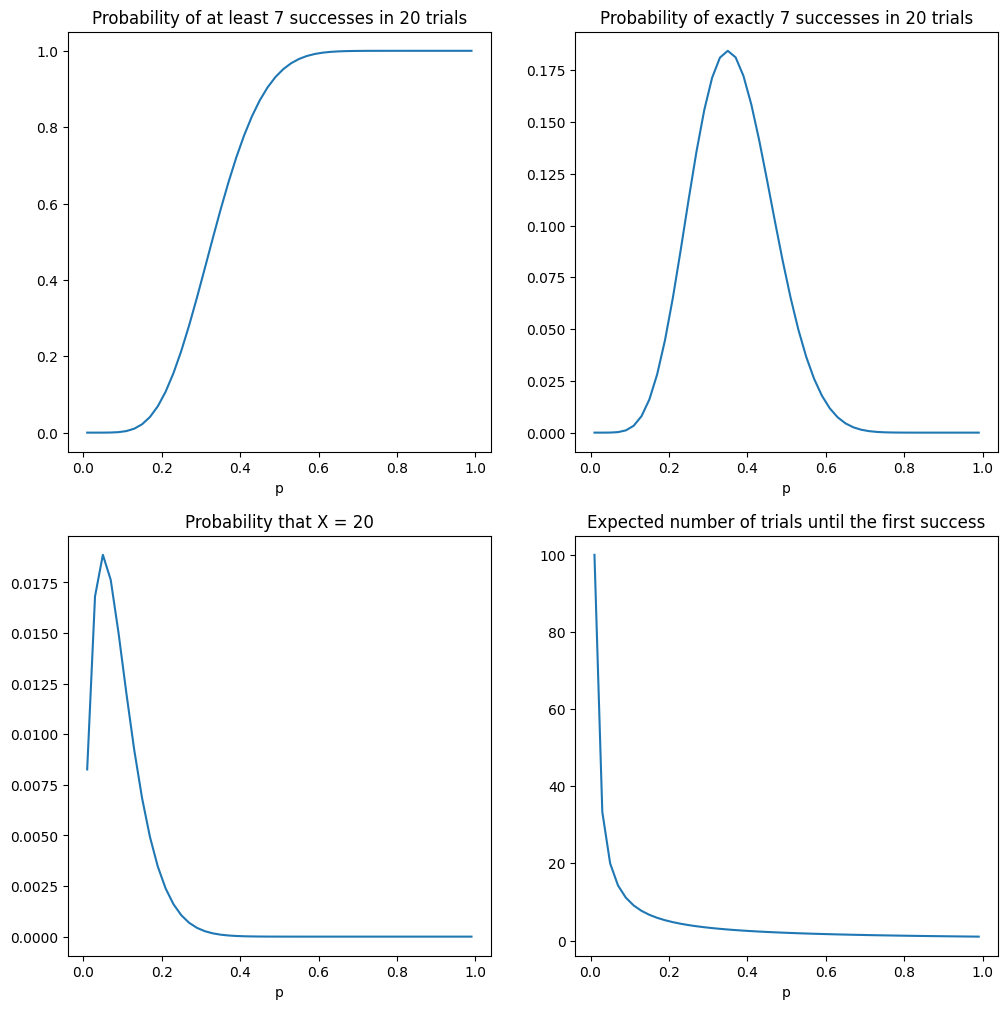

In [4]:
# Plot the results:
fig, axs = plt.subplots(2, 2, figsize=(12, 12))
for ax in axs.flat:
    ax.set(xlabel='p')
axs[0, 0].plot(p, at_least_7_successes)
axs[0, 0].set_title("Probability of at least 7 successes in 20 trials")
axs[0, 1].plot(p, exactly_7_successes)
axs[0, 1].set_title("Probability of exactly 7 successes in 20 trials")
axs[1, 0].plot(p, x_equals_20)
axs[1, 0].set_title("Probability that X = 20")
axs[1, 1].plot(p, expected_x)
axs[1, 1].set_title("Expected number of trials until the first success")
plt.show()

## Question 2

In this task you will simulate a simple slot machine.
Each time the slot machine is played, an outcome is chosen and some payout is awarded.
Given two `lists` representing the probabilities of each outcome and the payouts for each outcome, write a class `SlotMachine` that has the following methods:
- `play()`: returns the payout for the outcome.
- `expected_payout()`: returns the expected payout of the slot machine.
- `variance()`: returns the variance of the payout of the slot machine.


In [5]:
class SlotMachine:
    def __init__(self, probs: List[float], payouts: List[float]):
        """
        Initialize the slot machine.

        Parameters
        ----------
            probs : List[float]
                List of probabilities for each outcome.
            payouts : List[float]
                List of payouts for each outcome.
        """
        # It can be reasonable to check that the inputs are all lists of the same length,
        # that the probabilities are all positive and sum to 1, etc.
        # That is omitted for this exercise.
        self.probs = probs
        self.payouts = payouts
        
    
    def play(self) -> float:
        """
        Play the slot machine.

        Returns
        -------
            float
                Payout for the outcome.
        """
        return random.choices(self.payouts, self.probs)[0]
    
    def expected_payout(self) -> float:
        """
        Calculate the expected payout of the slot machine.

        Returns
        -------
            float
                Expected payout.
        """
        return sum(prob * pay for prob, pay in zip(self.probs, self.payouts))
    
    def variance(self) -> float:
        """
        Calculate the variance of the payout of the slot machine.

        Returns
        -------
            float
                Variance of the payout.
        """
        expected_payout = self.expected_payout()
        return sum(prob * (pay - expected_payout)**2 for prob, pay in zip(self.probs, self.payouts))

In [6]:
# Example usage
slot_machine = SlotMachine(probs=[0.5, 0.3, 0.2], payouts=[10, 5, 0])
print(slot_machine.play())
print(slot_machine.expected_payout())
print(slot_machine.variance())

5
6.5
15.25


For the slot machine with probabilities `[0.5, 0.3, 0.2]` and payouts `[10, 5, 0]`, run the `play()` method 10000 times and print the average payout:

In [7]:
payouts = [slot_machine.play() for _ in range(10000)]
print(np.mean(payouts))

6.51


## Question 3

Reproduce the two plots from slide 68 of the lecture notes: plot the CDF and PDF of the continuous uniform distributions $U(-2, 2)$, $U(0, 1)$, $U(1, 3)$ and $U(-1, 1)$. For each one of the distributions, what is the probability of drawing a number equal or less than $0$?
 

Probability of drawing a number equal or less than 0 from U(-2, 2): 0.5
Probability of drawing a number equal or less than 0 from U(0, 1): 0.0
Probability of drawing a number equal or less than 0 from U(1, 3): 0.0
Probability of drawing a number equal or less than 0 from U(-1, 1): 0.5


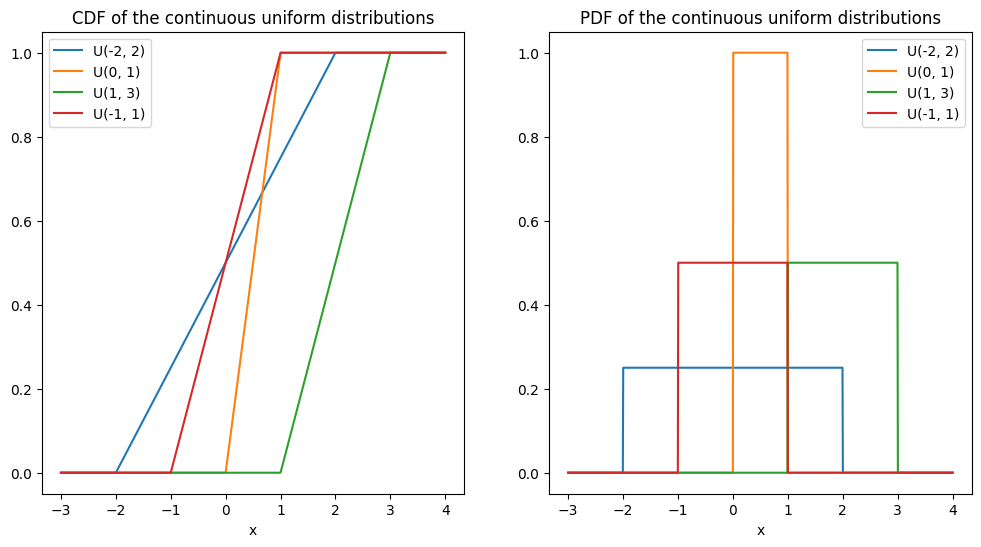

In [8]:
# Define the continuous uniform distributions
parameters = [{'loc': -2, 'scale': 4}, {'loc': 0, 'scale': 1}, {'loc': 1, 'scale': 2}, {'loc': -1, 'scale': 2}]
uniform_distributions = [uniform(**param) for param in parameters]
x = np.linspace(-3, 4, 1000)
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
for ax in axs.flat:
    ax.set(xlabel='x')
axs[0].set_title("CDF of the continuous uniform distributions")
axs[1].set_title("PDF of the continuous uniform distributions")
for dist, param in zip(uniform_distributions, parameters):
    axs[0].plot(x, dist.cdf(x), label=f"U({param['loc']}, {param['loc'] + param['scale']})")
    axs[1].plot(x, dist.pdf(x), label=f"U({param['loc']}, {param['loc'] + param['scale']})")
    print(f"Probability of drawing a number equal or less than 0 from U({param['loc']}, {param['loc'] + param['scale']}): {dist.cdf(0)}")
axs[0].legend()
axs[1].legend()
plt.show()